In [437]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

![Условие](https://sun9-53.userapi.com/impg/olKwoxFCu7fuEK9weGzi8UIjLR3-c9kTondMlw/MP6sOeIAGik.jpg?size=1600x1200&quality=96&sign=d5639e5dc8261d3af23be3407dc41b84&type=album)

## Начальные данные

In [438]:
Lx = 2
Ly = 1
hx = 0.1
hy = 0.1

In [439]:
nx = int(Lx/hx)
ny = int(Ly/hy)

In [440]:
a = -2 / hy**2 - 2 / hx ** 2
b = 1/hx**2
c = 1/hx**2
d = 1/hy**2
e = 1/hy**2

In [441]:
g = np.ones(nx*ny) * 2

In [442]:
A = np.zeros((nx*ny, nx*ny))
A.shape

(200, 200)

## Заполняем матрицу системы и вектор правой части

In [443]:
for i in range(ny):
    for j in range(nx):
        ind = j + i * nx
        
        if i == 0 or i == ny-1 or j == 0 or j == nx -1:
            A[ind, ind] = 1
            g[ind] = 2
        else:
            g[ind] = 0
            A[ind, ind] = a
            if ind + 1 < nx * ny:
                A[ind, ind + 1] = b
            if ind - 1 >= 0:
                A[ind, ind - 1] = c
            if ind + nx + 1 < nx*ny:
                A[ind, ind + nx + 1] = d
            if ind - nx - 1 >= 0:
                A[ind, ind - nx - 1] = e
            

## Ставим 1 в правой части на положение, соответствующее x = 0.5 и y = 0.5

In [444]:
rightInd = int(0.5/hx) + (int(0.5/hy) - 1) * nx
g[rightInd] = 1
g.shape

(200,)

## Решаем систему

In [445]:
U = np.linalg.solve(A, g)

In [446]:
Umat = np.reshape(U, (ny, nx))

## Строим график решения

In [447]:
x = np.arange(0,2,hx)
y = np.arange(0,1,hy)

xs, ys = np.meshgrid(x, y)

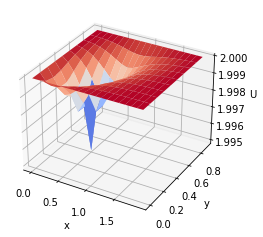

In [451]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xs, ys, Umat, cmap=cm.coolwarm)
ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_zlabel("U")
plt.show()

<AxesSubplot:>

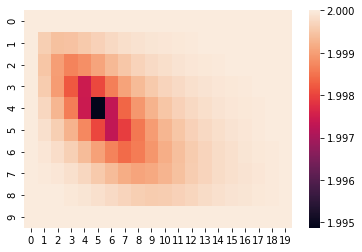

In [449]:
sns.heatmap(Umat)